In [1]:
import yaml
from context import Dataset
from context import Predictor_CVM
from context import Predictor_sof, Predictor_zan, Predictor_kara, TrajectronPredictor
from context import Evaluator

['/home/rua7rng/code/the-atlas-benchmark/Trajectron-plus-plus/trajectron', '/home/rua7rng/code/the-atlas-benchmark/src', '/home/rua7rng/code/the-atlas-benchmark/demo', '/home/rua7rng/.vscode/extensions/ms-toolsai.jupyter-2022.2.1030672458/pythonFiles', '/home/rua7rng/.vscode/extensions/ms-toolsai.jupyter-2022.2.1030672458/pythonFiles/lib/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/rua7rng/code/the-atlas-benchmark/.venv/lib/python3.8/site-packages', '/home/rua7rng/.local/lib/python3.8/site-packages', '..', '..', '..', '..']


Create the dataset object based on the yaml file configuration

In [45]:
#input_dataset = '../cfg/dataset_config_simulated_opposing.yaml'
#input_dataset = '../cfg/dataset_config_simulated_chasing.yaml'
input_dataset = '../cfg/dataset_config_simulated_crossing.yaml'

with open(input_dataset, 'r') as file:
    benchmark_cfg = yaml.load(file, Loader=yaml.FullLoader)

dataset = Dataset(benchmark_cfg, split=[0,1])

observation_len = benchmark_cfg['benchmark']['setup']['observation period']
prediction_horizon = benchmark_cfg['benchmark']['setup']['prediction horizon']

valid_scenes = dataset.extract_scenarios(prediction_horizon, observation_len)

The simulated-chasing dataset has 4 valid scenes with observation length 8 and prediction horizon 12 out of 23 scenes total.


In [46]:
with open('../cfg/method_config_sof.yaml', 'r') as file:
    method_cfg = yaml.load(file, Loader=yaml.FullLoader)

scene = 0

method_cfg['param']['uncertainty']['uncertainty'] = False
predictor_certain = Predictor_sof(dataset, method_cfg)
predictions_sof = predictor_certain.predict(valid_scenes[scene])

predictor_certain = TrajectronPredictor(valid_scenes[scene], dataset)
predictions_tpp = predictor_certain.predict(valid_scenes[scene])


Loading from /home/rua7rng/code/the-atlas-benchmark/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt
Loaded!



/home/rua7rng/code/the-atlas-benchmark/.venv/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rua7rng/code/the-atlas-benchmark/.venv/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rua7rng/code/the-atlas-benchmark/.venv/lib/python3.8/site-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has chan

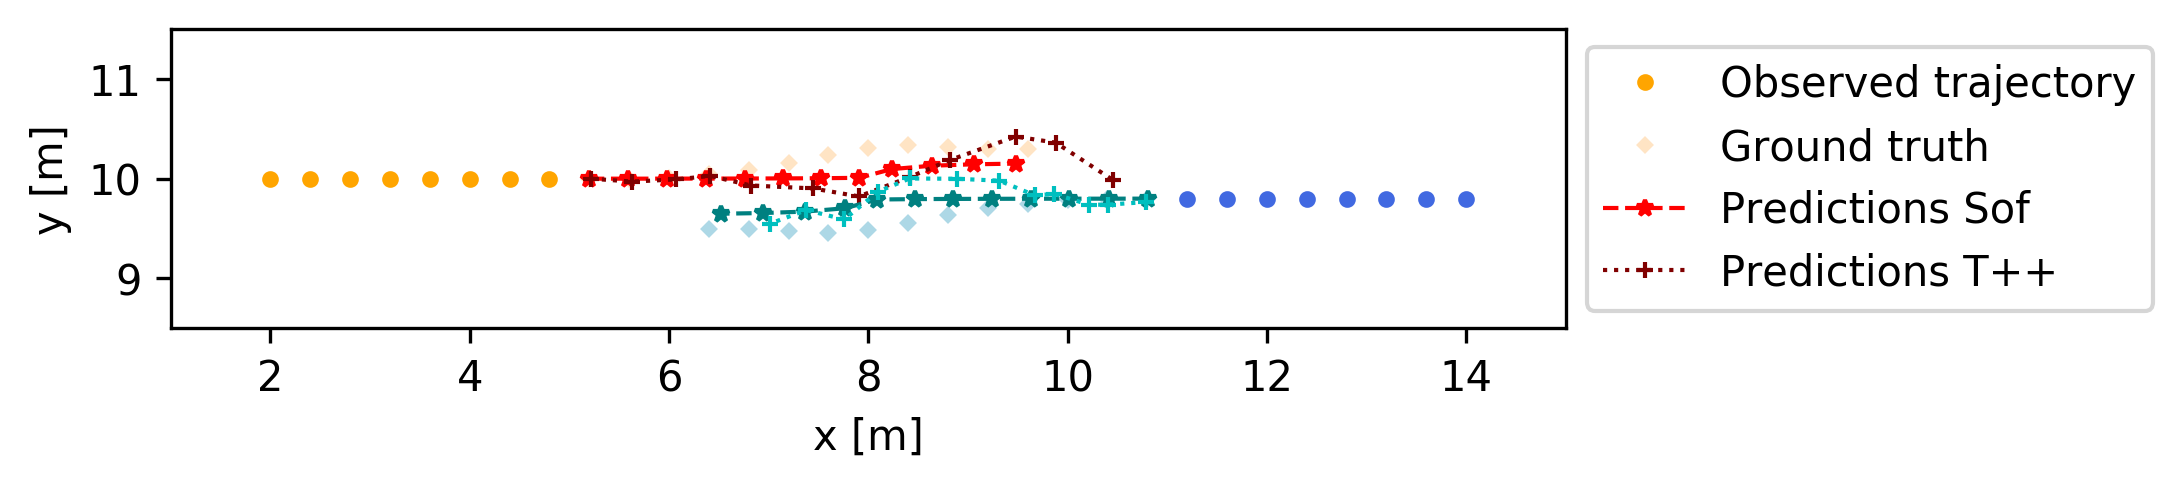

In [40]:
# --- opposing ---

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt

plt.plot(valid_scenes[scene].trajectories[0][:,0], valid_scenes[scene].trajectories[0][:,1],'.', color='orange', label='Observed trajectory')
plt.plot(valid_scenes[scene].trajectories[1][:,0], valid_scenes[scene].trajectories[1][:,1],'.', color='royalblue')
plt.plot(valid_scenes[scene].gt[0][:,0], valid_scenes[scene].gt[0][:,1],'D',color='bisque',markersize=2,label='Ground truth')
plt.plot(valid_scenes[scene].gt[1][:,0], valid_scenes[scene].gt[1][:,1],'D',color='lightblue',markersize=2)
plt.plot(predictions_sof.trajectories[0][:,0,0], predictions_sof.trajectories[0][:,0,1], '--*', linewidth=1, color='red', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,0,0], predictions_tpp.trajectories[0][:,0,1], ':+', linewidth=1, color='maroon', markersize=4, label='Predictions T++')
plt.plot(predictions_sof.trajectories[0][:,1,0], predictions_sof.trajectories[0][:,1,1], '--*', linewidth=1, color='teal', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,1,0], predictions_tpp.trajectories[0][:,1,1], ':+', linewidth=1, color='c', markersize=4, label='Predictions T++')

handles, labels = ax.get_legend_handles_labels()
i = 1
while i < len(labels):
    if labels[i] in labels[:i]:
        del (labels[i])
        del (handles[i])
    else:
        i += 1
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('y [m]')
plt.xlabel('x [m]')
ax = plt.gca()
ax.set_xlim([1, 15]) # opposing
ax.set_ylim([8.5, 11.5]) # opposing
#ax.set_xlim([-1, 12]) # chasing
#ax.set_ylim([-1, 2]) # chasing
#axes = plt.axes()
#plt.gca().set_aspect('equal')
plt.gca().set_aspect('equal', adjustable='box')
#ax.axis('equal')
#plt.axis('equal')
plt.draw()

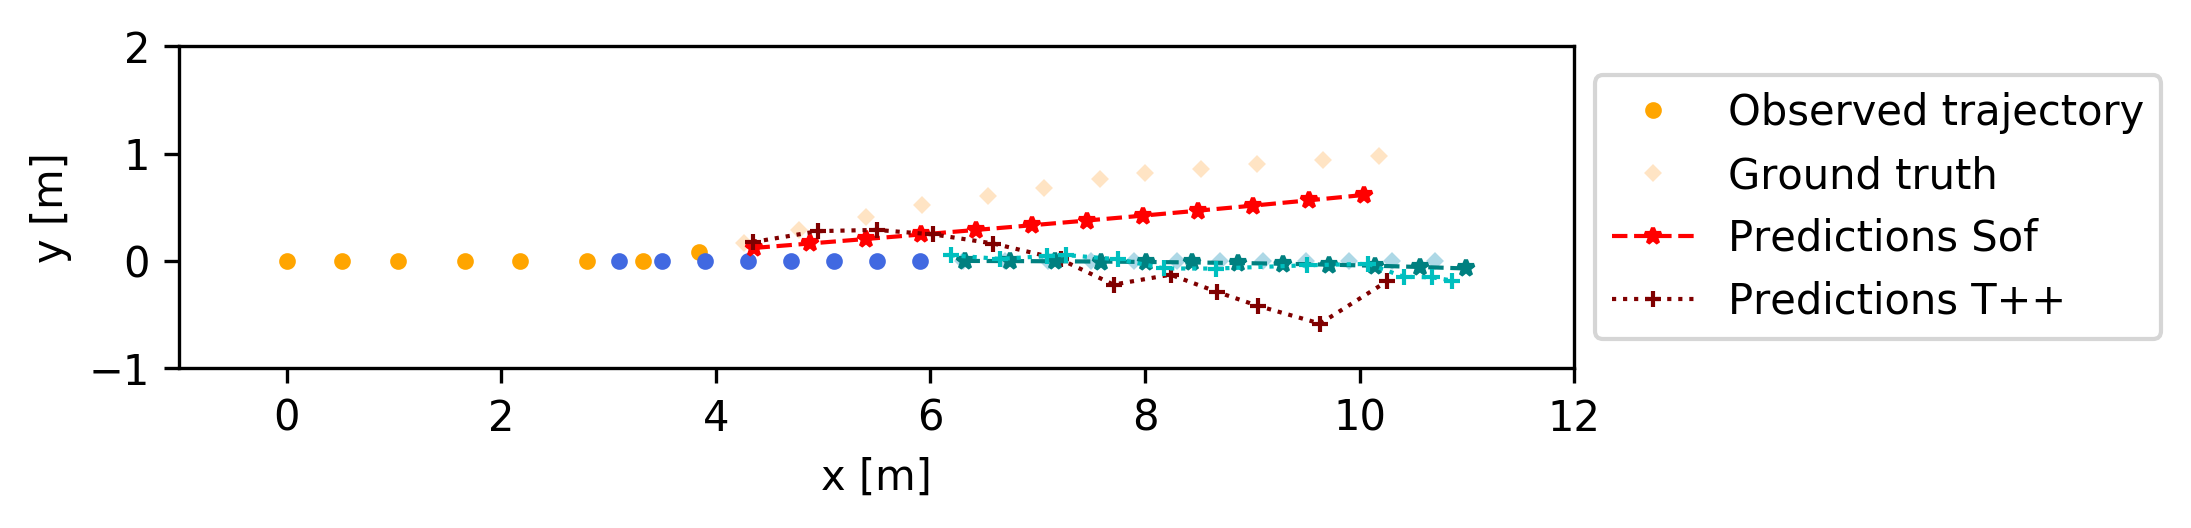

In [47]:
# --- chasing ---

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt

plt.plot(valid_scenes[scene].trajectories[0][:,0], valid_scenes[scene].trajectories[0][:,1],'.', color='orange', label='Observed trajectory')
plt.plot(valid_scenes[scene].trajectories[1][:,0], valid_scenes[scene].trajectories[1][:,1],'.', color='royalblue')
plt.plot(valid_scenes[scene].gt[0][:,0], valid_scenes[scene].gt[0][:,1],'D',color='bisque',markersize=2,label='Ground truth')
plt.plot(valid_scenes[scene].gt[1][:,0], valid_scenes[scene].gt[1][:,1],'D',color='lightblue',markersize=2)
plt.plot(predictions_sof.trajectories[0][:,0,0], predictions_sof.trajectories[0][:,0,1], '--*', linewidth=1, color='red', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,0,0], predictions_tpp.trajectories[0][:,0,1], ':+', linewidth=1, color='maroon', markersize=4, label='Predictions T++')
plt.plot(predictions_sof.trajectories[0][:,1,0], predictions_sof.trajectories[0][:,1,1], '--*', linewidth=1, color='teal', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,1,0], predictions_tpp.trajectories[0][:,1,1], ':+', linewidth=1, color='c', markersize=4, label='Predictions T++')

handles, labels = ax.get_legend_handles_labels()
i = 1
while i < len(labels):
    if labels[i] in labels[:i]:
        del (labels[i])
        del (handles[i])
    else:
        i += 1
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('y [m]')
plt.xlabel('x [m]')
ax = plt.gca()
#ax.set_xlim([1, 15]) # opposing
#ax.set_ylim([8.5, 11.5]) # opposing
ax.set_xlim([-1, 12]) # chasing
ax.set_ylim([-1, 2]) # chasing
#axes = plt.axes()
#plt.gca().set_aspect('equal')
plt.gca().set_aspect('equal', adjustable='box')
#ax.axis('equal')
#plt.axis('equal')
plt.draw()

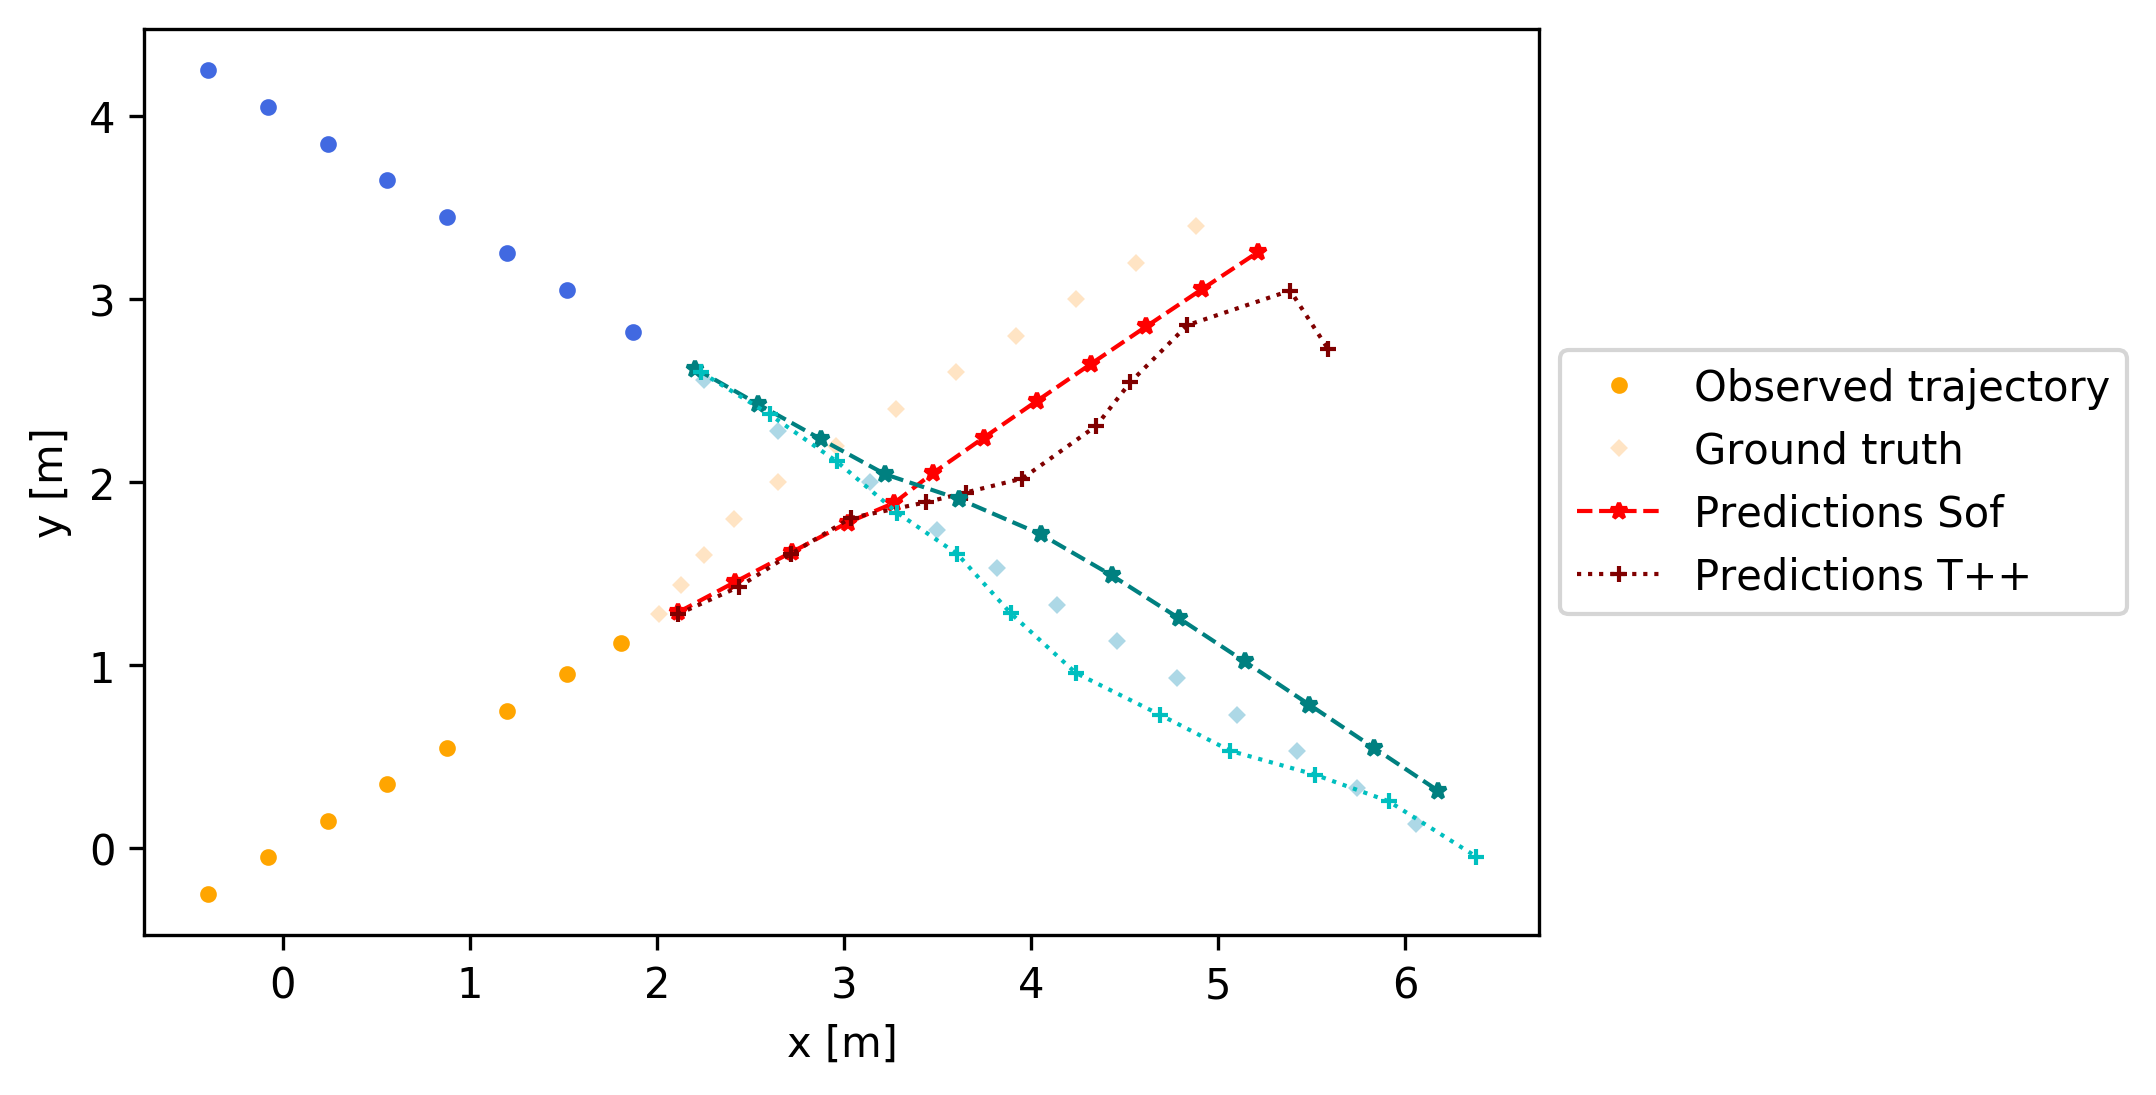

In [31]:
# --- crossing ---

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import matplotlib.pyplot as plt

plt.plot(valid_scenes[scene].trajectories[0][:,0], valid_scenes[scene].trajectories[0][:,1],'.', color='orange', label='Observed trajectory')
plt.plot(valid_scenes[scene].trajectories[1][:,0], valid_scenes[scene].trajectories[1][:,1],'.', color='royalblue')
plt.plot(valid_scenes[scene].gt[0][:,0], valid_scenes[scene].gt[0][:,1],'D',color='bisque',markersize=2,label='Ground truth')
plt.plot(valid_scenes[scene].gt[1][:,0], valid_scenes[scene].gt[1][:,1],'D',color='lightblue',markersize=2)
plt.plot(predictions_sof.trajectories[0][:,0,0], predictions_sof.trajectories[0][:,0,1], '--*', linewidth=1, color='red', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,0,0], predictions_tpp.trajectories[0][:,0,1], ':+', linewidth=1, color='maroon', markersize=4, label='Predictions T++')
plt.plot(predictions_sof.trajectories[0][:,1,0], predictions_sof.trajectories[0][:,1,1], '--*', linewidth=1, color='teal', markersize=4, label='Predictions Sof')
plt.plot(predictions_tpp.trajectories[0][:,1,0], predictions_tpp.trajectories[0][:,1,1], ':+', linewidth=1, color='c', markersize=4, label='Predictions T++')

handles, labels = ax.get_legend_handles_labels()
i = 1
while i < len(labels):
    if labels[i] in labels[:i]:
        del (labels[i])
        del (handles[i])
    else:
        i += 1
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('y [m]')
plt.xlabel('x [m]')
ax = plt.gca()
ax.set_xlim([-1, 12]) # crossing
ax.set_ylim([-1, 2]) # crossing
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()